<a href="https://colab.research.google.com/github/swhacademy/swhacademy.github.com/blob/master/0_4_KoNLPy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 참고 사이트


*   https://github.com/KoNLPy/KoNLPy
*   http://KoNLPy.org/ko/latest/
*   https://konlpy-ko.readthedocs.io/ko/v0.5.1/morph/

# KoNLPy


*   한글 형태소 분석을 위한 파이썬 패키지


> ### 형태소 분석
>> 언어를 가장 최소단위인 형태소로 분석하여 어근, 접두사/접미사, 각종 품사들을 통해 구조를 파악

> ### 자연어 처리
>> 인간의 언어를 컴퓨터와 같은 기계를 이용하여 흉내낼 수 있도록 연구하고 구현하는 인공지능의 분야

*   아래의 형태소 분석을 위한 라이브러리를 모두 포함

> * Hannanum: 한나눔 http://semanticweb.kaist.ac.kr/hannanum/
> * Kkma: 꼬꼬마. http://kkma.snu.ac.kr/
> * Mecab: 메카브. https://bitbucket.org/eunjeon/mecab-ko
> * Komoran: 코모란. https://github.com/shin285/KOMORAN
> * Open Korean Text: 오픈 소스 한국어 분석기(previous Twitter). https://github.com/open-korean-text/open-korean-text

![성능비교](https://konlpy-ko.readthedocs.io/ko/v0.5.1/_images/time.png)

## KoNLPy 설치
[Mecab 설치](https://colab.research.google.com/drive/1ny8AKkcuocsm8A45xHfI05OsqLqSEHjd)

In [0]:
!pip install konlpy
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!pip3 install JPype1-py3

import os
os.chdir('/tmp/')
!curl -LO https://bitbucket.org/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.1.tar.gz
!tar zxfv mecab-0.996-ko-0.9.1.tar.gz
os.chdir('/tmp/mecab-0.996-ko-0.9.1')
!./configure
!make
!make check
!make install
!apt-get install automake

import os
os.chdir('/tmp/')
!wget -O m4-1.4.9.tar.gz http://ftp.gnu.org/gnu/m4/m4-1.4.9.tar.gz
!tar -zvxf m4-1.4.9.tar.gz
os.chdir('/tmp/m4-1.4.9')
!./configure
!make
!make install
!apt-get install autoconf

import os
os.chdir('/tmp')
!curl -LO https://bitbucket.org/eunjeon/mecab-ko-dic/downloads/mecab-ko-dic-2.0.1-20150920.tar.gz
!tar -zxvf mecab-ko-dic-2.0.1-20150920.tar.gz
os.chdir('/tmp/mecab-ko-dic-2.0.1-20150920')
!./autogen.sh
!./configure
!make
# !sh -c 'echo "dicdir=/usr/local/lib/mecab/dic/mecab-ko-dic" > /usr/local/etc/mecabrc'
!make install

os.chdir('/tmp/mecab-ko-dic-2.0.1-20150920')
!ldconfig
!ldconfig -p | grep /usr/local/lib

# install mecab-python
import os
os.chdir('/content')

!git clone https://bitbucket.org/eunjeon/mecab-python-0.996.git
os.chdir('/content/mecab-python-0.996')

!python3 setup.py build
!python3 setup.py install

In [0]:
from konlpy.tag import Mecab
from konlpy.tag import Hannanum
from konlpy.tag import Kkma
mecab = Mecab()
hannanum = Hannanum()
kkma = Kkma()

## KoNLPy 예제 말뭉치


*   대한민국 헌법 말뭉치인 kolaw와 국회법안 말뭉치인 kobill을 제공
*   말뭉치가 포함하는 파일의 이름은 fields 메서드로 알 수 있고 open 메서드로 해당 파일의 텍스트을 읽어옴



In [20]:
from konlpy.corpus import kolaw
kolaw.fileids()

['constitution.txt']

In [7]:
c = kolaw.open('constitution.txt').read()
print(c[:40])

대한민국헌법

유구한 역사와 전통에 빛나는 우리 대한국민은 3·1운동으로


## 명사 / 형태소 추출

In [8]:
mecab.nouns(c[:40]) # 명사

['대한민국', '헌법', '역사', '전통', '우리', '국민', '운동']

In [9]:
hannanum.nouns(c[:40])

['대한민국헌법', '유구', '역사', '전통', '빛', '우리', '대한국민', '3·1운동']

In [10]:
mecab.morphs(c[:40]) # 형태소

['대한민국',
 '헌법',
 '유구',
 '한',
 '역사',
 '와',
 '전통',
 '에',
 '빛나',
 '는',
 '우리',
 '대한',
 '국민',
 '은',
 '3',
 '·',
 '1',
 '운동',
 '으로']

In [11]:
hannanum.morphs(c[:40]) # 형태소

['대한민국헌법',
 '유구',
 '하',
 'ㄴ',
 '역사',
 '와',
 '전통',
 '에',
 '빛',
 '나는',
 '우리',
 '대한국민',
 '은',
 '3·1운동',
 '으로']

## 품사 부착

In [12]:
mecab.pos(c[:40]) # 품사

[('대한민국', 'NNP'),
 ('헌법', 'NNG'),
 ('유구', 'XR'),
 ('한', 'XSA+ETM'),
 ('역사', 'NNG'),
 ('와', 'JC'),
 ('전통', 'NNG'),
 ('에', 'JKB'),
 ('빛나', 'VV'),
 ('는', 'ETM'),
 ('우리', 'NP'),
 ('대한', 'VV+ETM'),
 ('국민', 'NNG'),
 ('은', 'JX'),
 ('3', 'SN'),
 ('·', 'SC'),
 ('1', 'SN'),
 ('운동', 'NNG'),
 ('으로', 'JKB')]

In [13]:
hannanum.pos(c[:40]) # 품사

[('대한민국헌법', 'N'),
 ('유구', 'N'),
 ('하', 'X'),
 ('ㄴ', 'E'),
 ('역사', 'N'),
 ('와', 'J'),
 ('전통', 'N'),
 ('에', 'J'),
 ('빛', 'N'),
 ('나는', 'J'),
 ('우리', 'N'),
 ('대한국민', 'N'),
 ('은', 'J'),
 ('3·1운동', 'N'),
 ('으로', 'J')]

In [14]:
mecab.tagset # 품사 정보

{'EC': '연결 어미',
 'EF': '종결 어미',
 'EP': '선어말어미',
 'ETM': '관형형 전성 어미',
 'ETN': '명사형 전성 어미',
 'IC': '감탄사',
 'JC': '접속 조사',
 'JKB': '부사격 조사',
 'JKC': '보격 조사',
 'JKG': '관형격 조사',
 'JKO': '목적격 조사',
 'JKQ': '인용격 조사',
 'JKS': '주격 조사',
 'JKV': '호격 조사',
 'JX': '보조사',
 'MAG': '일반 부사',
 'MAJ': '접속 부사',
 'MM': '관형사',
 'NNB': '의존 명사',
 'NNBC': '단위를 나타내는 명사',
 'NNG': '일반 명사',
 'NNP': '고유 명사',
 'NP': '대명사',
 'NR': '수사',
 'SC': '구분자 , · / :',
 'SE': '줄임표 …',
 'SF': '마침표, 물음표, 느낌표',
 'SH': '한자',
 'SL': '외국어',
 'SN': '숫자',
 'SSC': '닫는 괄호 ), ]',
 'SSO': '여는 괄호 (, [',
 'SY': '기타 기호',
 'VA': '형용사',
 'VCN': '부정 지정사',
 'VCP': '긍정 지정사',
 'VV': '동사',
 'VX': '보조 용언',
 'XPN': '체언 접두사',
 'XR': '어근',
 'XSA': '형용사 파생 접미사',
 'XSN': '명사파생 접미사',
 'XSV': '동사 파생 접미사'}

In [15]:
import pandas as pd
tagsets = pd.DataFrame()
N = 50
tagsets["Mecab-기호"] = list(mecab.tagset.keys()) + list("*" * (N - len(mecab.tagset)))
tagsets["Mecab-품사"] = list(mecab.tagset.values()) + list("*" * (N - len(mecab.tagset)))
tagsets

,Mecab-기호,Mecab-품사
0,EC,연결 어미
1,EF,종결 어미
2,EP,선어말어미
3,ETM,관형형 전성 어미
4,ETN,명사형 전성 어미
5,IC,감탄사
6,JC,접속 조사
7,JKB,부사격 조사
8,JKC,보격 조사
9,JKG,관형격 조사


## 형태소 분석

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 51312 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 48277 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 47456 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 45824 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 53685 missing from current font.
  font.set_

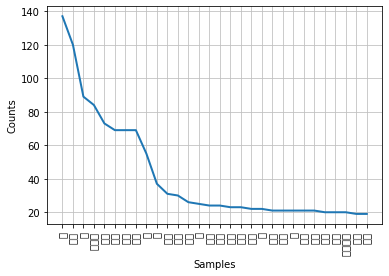

NameError: ignored

In [16]:
from nltk import Text

kolaw = Text(mecab.nouns(c), name="kolaw")
kolaw.plot(30)
plt.show()

In [0]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
wc = WordCloud(width = 1000, height = 600, background_color="white", font_path=font_path)
plt.imshow(wc.generate_from_frequencies(kolaw.vocab()))
plt.axis("off")
plt.show()

## 사용자 사전 추가

[사용자 사전 추가 방법](https://cromboltz.tistory.com/18)